In [53]:
%run -n main.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Loading BokehJS ...

In [52]:
%run -n main.py
summary = list(log_progress(load_summary()))

In [53]:
%run -n main.py
cells = {_.cell for _ in summary if _.cell}
selected = [_ for _ in cells if is_inside(_.corner, MOSCOW_BOX)]

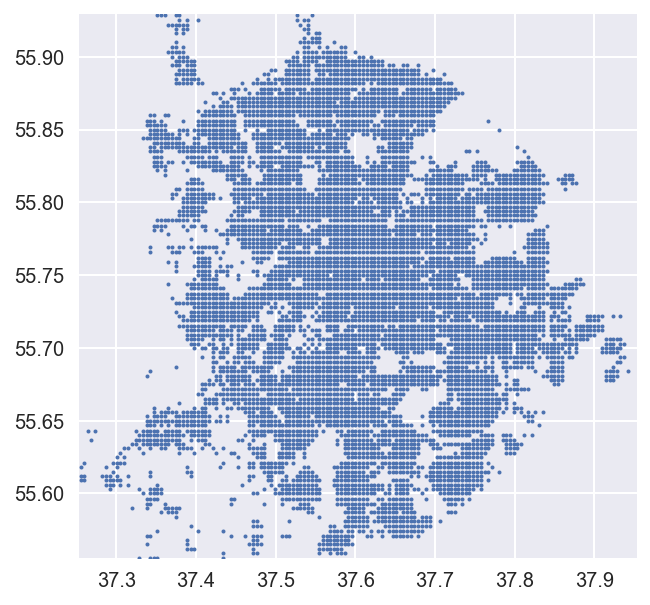

In [54]:
%run -n main.py
show_cell_corners(selected, MOSCOW_BOX)

In [55]:
cell_xys = {
    cell: (x, y)
    for cell, x, y in get_cell_xys(selected)
}

In [56]:
table = pd.DataFrame(summary)
table.sample(5)

,date,group,type,victims,dead,cell
34375,2016-03-29,Глава 21. Преступления против собственности,Средняя тяжесть,1,0,"((55.816, 37.623), ((55.816, 37.623), (55.816,..."
17090,2016-02-16,Глава 21. Преступления против собственности,Небольшая тяжесть,1,0,"((55.715, 37.619), ((55.715, 37.619), (55.715,..."
39184,2016-04-09,Глава 32. Преступления против порядка управления,Небольшая тяжесть,0,0,"((55.703, 37.919), ((55.703, 37.919), (55.703,..."
38776,2016-04-09,Глава 16. Преступления против жизни и здоровья,Небольшая тяжесть,1,0,"((55.631, 37.706), ((55.631, 37.706), (55.631,..."
28277,2016-03-15,Глава 16. Преступления против жизни и здоровья,Небольшая тяжесть,1,0,"((55.7, 37.407), ((55.7, 37.407), (55.7, 37.41..."


In [57]:
view = table.groupby(['group', 'type']).size().unstack()
order = view.sum(axis=1).sort_values(ascending=False).index
view.reindex(index=order)

type,Небольшая тяжесть,Особо тяжкие,Средняя тяжесть,Тяжкие
group,,,,
Глава 21. Преступления против собственности,42701.0,424.0,57375.0,18563.0
Глава 25. Преступления против здоровья населения и общественной нравственности,3712.0,6665.0,359.0,5268.0
Глава 32. Преступления против порядка управления,8894.0,NaN,823.0,25.0
Глава 16. Преступления против жизни и здоровья,4963.0,538.0,171.0,895.0
Глава 24. Преступления против общественной безопасности,247.0,19.0,826.0,96.0
Глава 27. Преступления против безопасности движения и эксплуатации транспорта,363.0,NaN,224.0,NaN
Глава 22. Преступления в сфере экономической деятельности,16.0,NaN,56.0,74.0
Глава 18. Преступления против половой неприкосновенности и половой свободы личности,5.0,24.0,3.0,108.0
"Глава 17. Преступления против свободы, чести и достоинства личности",NaN,26.0,1.0,NaN


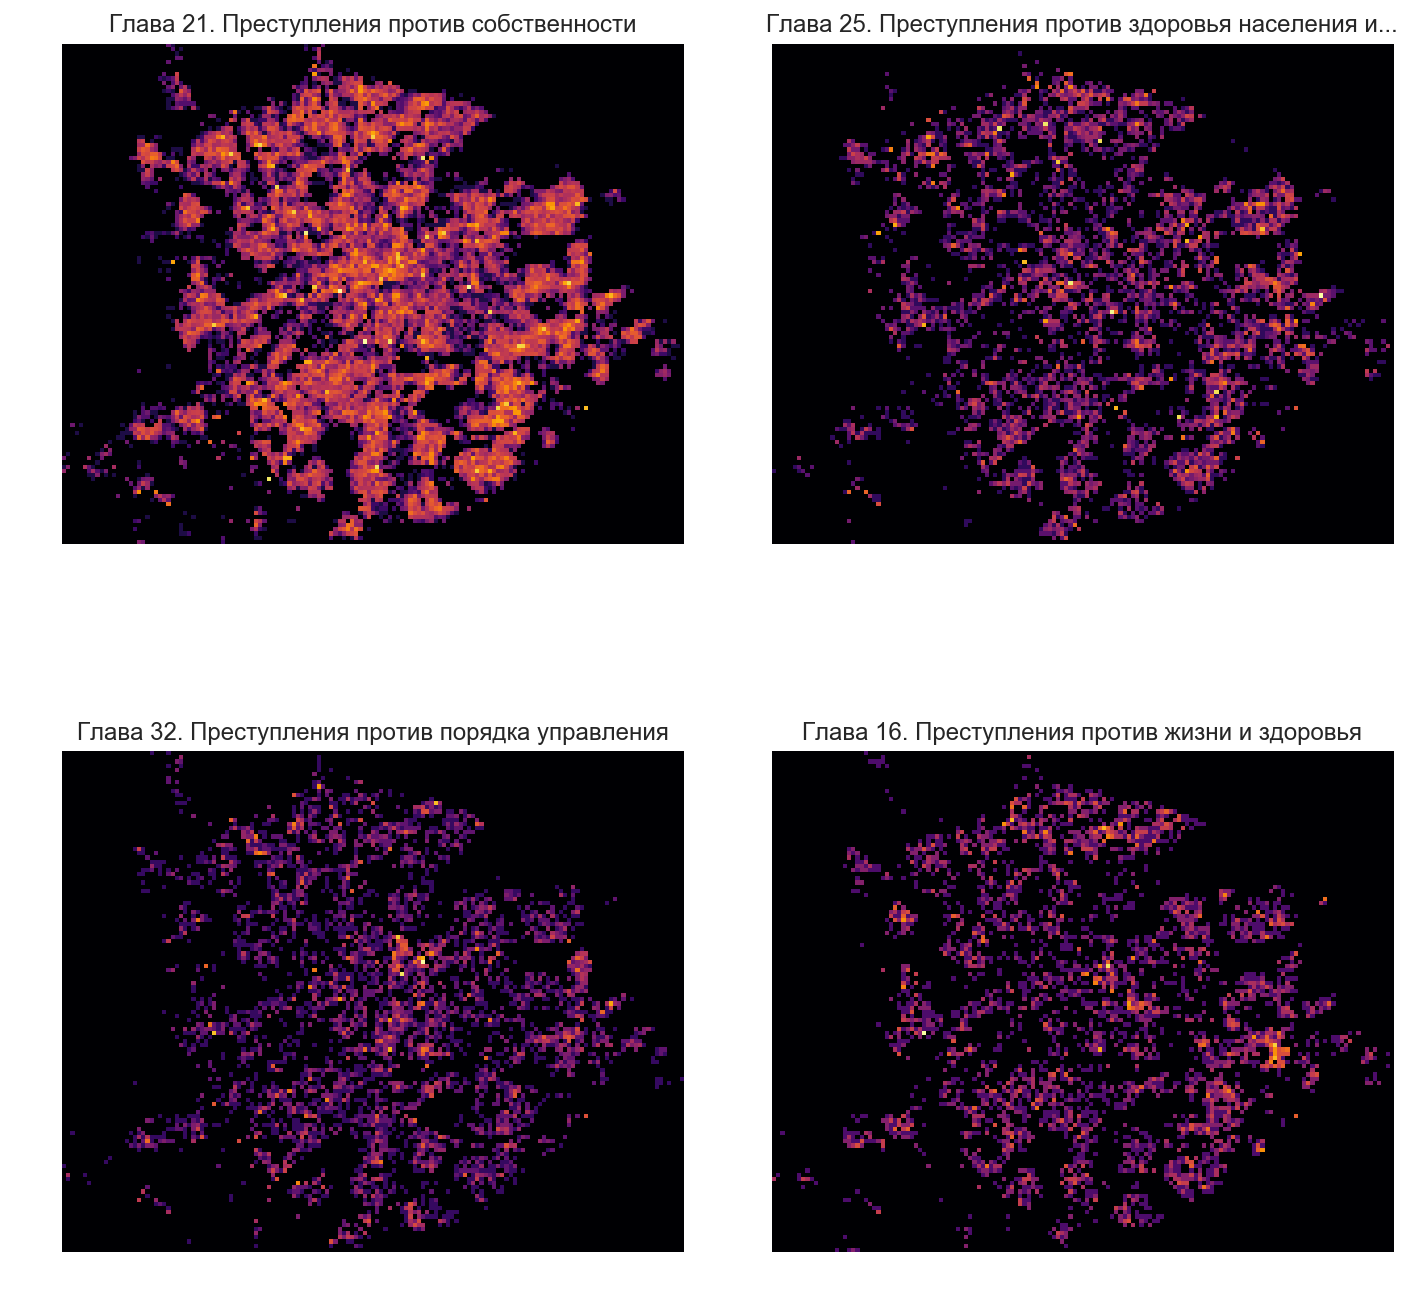

In [215]:
%run -n main.py
show_group_maps(table, cell_xys)

# Map

In [1]:
%run -n main.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
bk.output_notebook()

formater = get_ipython().display_formatter.formatters['text/html']
formater.for_type(bk.Figure, bk.show)

/Users/alexkuk/envs/mypy3/lib/python3.5/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


Loading BokehJS ...

In [58]:
view = table[table.group == 'Глава 21. Преступления против собственности']
view = view.groupby('cell').size()

In [59]:
%run -n main.py
heatmap = get_cell_series_heatmap(view, cell_xys, log=False)

In [60]:
%run -n main.py
image = tf.shade(xr.DataArray(heatmap), alpha=150, cmap=inferno, how='log')

In [64]:
image = image.to_pil()

In [66]:
image.size

(149, 120)

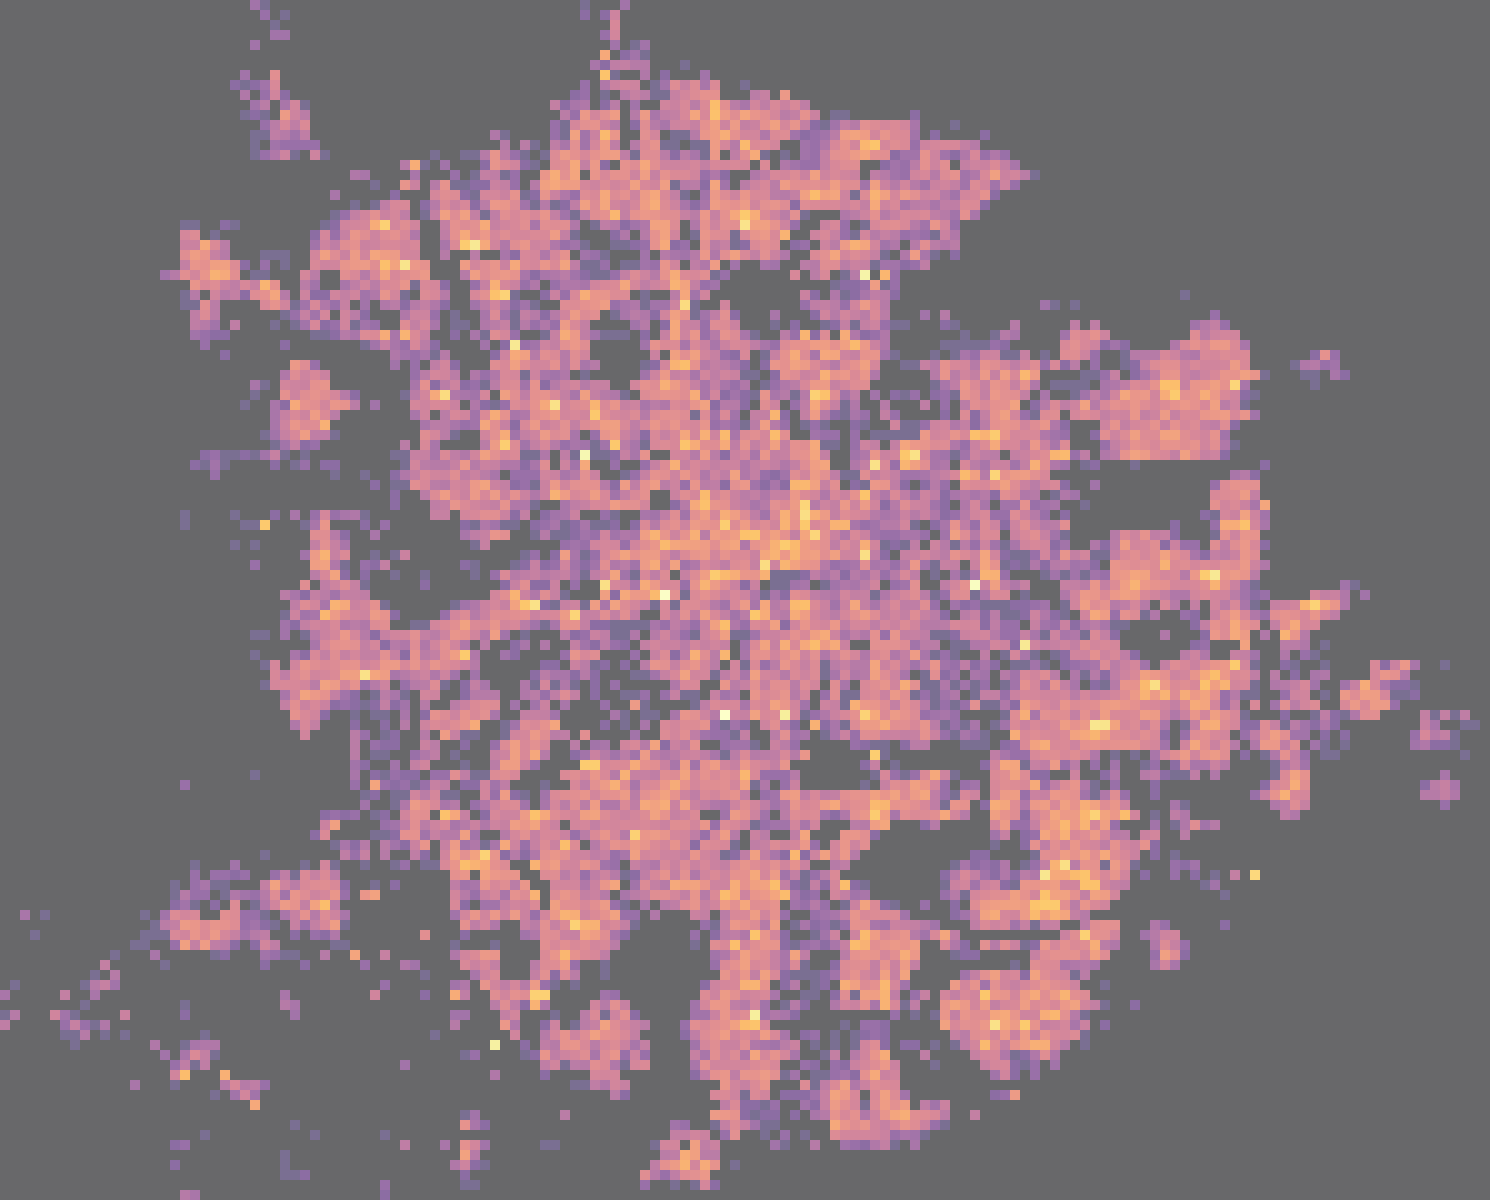

In [67]:
image.resize([1490, 1200])

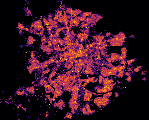

In [11]:
tf.shade(xr.DataArray(heatmap), cmap=inferno, how='log')

In [72]:
for group, label in [('Глава 21. Преступления против собственности', '21'),
                     ('Глава 25. Преступления против здоровья населения и общественной нравственности', '25'),
                    ('Глава 32. Преступления против порядка управления', '32'),
                    ('Глава 16. Преступления против жизни и здоровья', '16')]:
    view = table[table.group == group]
    view = view.groupby('cell').size()
    heatmap = get_cell_series_heatmap(view, cell_xys, log=False)
    image = tf.shade(xr.DataArray(heatmap), alpha=150, cmap=inferno, how='log')
    print(group, label)
    image.to_pil().resize([1490 * 3, 1200 * 3]).save('viz/i/{}.png'.format(label))

Глава 21. Преступления против собственности 21
Глава 25. Преступления против здоровья населения и общественной нравственности 25
Глава 32. Преступления против порядка управления 32
Глава 16. Преступления против жизни и здоровья 16


In [73]:
next(iter(cell_xys))

Cell(corner=Point(latitude=55.75, longitude=37.799), points=(Point(latitude=55.75, longitude=37.799), Point(latitude=55.75, longitude=37.803), Point(latitude=55.753, longitude=37.803), Point(latitude=55.753, longitude=37.799)))

In [51]:
lower_left_longitude = None
lower_left_latitude = None
upper_right_longitude = None
upper_right_latitude = None
for cell in cell_xys:
    for point in cell.points:
        latitude, longitude = convert_point(point)
        if lower_left_longitude is None or longitude < lower_left_longitude:
            lower_left_longitude = longitude
        if lower_left_latitude is None or latitude < lower_left_latitude:
            lower_left_latitude = latitude
        if upper_right_longitude is None or longitude > upper_right_longitude:
            upper_right_longitude = longitude
        if upper_right_latitude is None or latitude > upper_right_latitude:
            upper_right_latitude = latitude
width = upper_right_longitude - lower_left_longitude
height = upper_right_latitude - lower_left_latitude

In [50]:
upper_right_longitude, lower_left_longitude, upper_right_latitude, lower_left_latitude

(37.927, 37.254, 55.926, 55.562)

In [13]:
# xs = []
# ys = []
# for record in metro:
#     y, x = convert_point(record.point)
#     xs.append(x)
#     ys.append(y)

In [35]:
%run -n main.py
map = get_map(MOSCOW_BOX, YANDEX)
map.image_rgba(image=[image.data], x=[lower_left_longitude], y=[lower_left_latitude], dw=[width], dh=[height])
# map.scatter(xs, ys, size=5, color='white')
map

Figure(id='7a389c24-ee95-49ca-bee2-812be449f178', ...)

# Narkota

In [38]:
%run -n main.py
narkota = list(load_narkota())

In [39]:
table = pd.DataFrame(narkota)
table['total'] = table.sbit_try + table.hran + table.storage + table.other
table.head()

,date,sbit_try,hran,storage,other,cell,total
0,2013-01-06,0,0,0,1,"((55.589, 37.593), ((55.589, 37.593), (55.589,...",1
1,2013-01-06,0,0,1,0,"((55.599, 37.159), ((55.599, 37.159), (55.599,...",1
2,2013-01-06,0,0,0,1,"((55.618, 37.76), ((55.618, 37.76), (55.618, 3...",1
3,2013-01-06,0,0,0,1,"((55.627, 37.668), ((55.627, 37.668), (55.627,...",1
4,2013-01-06,0,0,0,1,"((55.637, 37.748), ((55.637, 37.748), (55.637,...",1


In [40]:
cells = {_.cell for _ in narkota if _.cell}
selected = [_ for _ in cells if is_inside(_.corner, MOSCOW_BOX)]

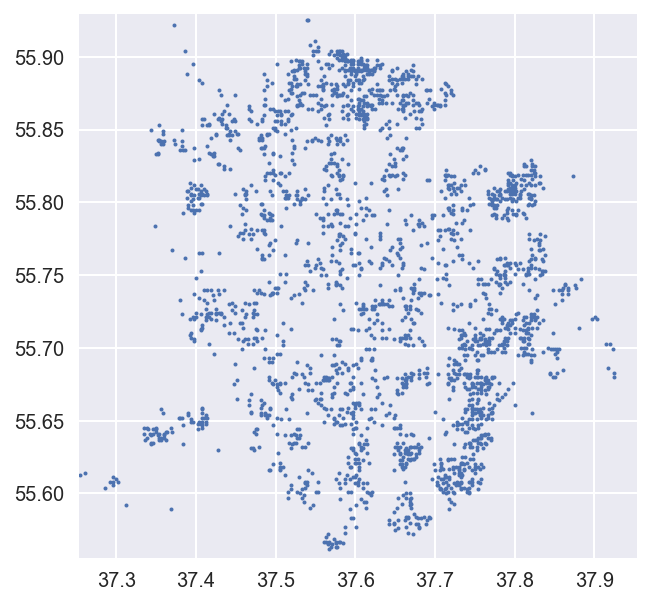

In [41]:
show_cell_corners(selected, MOSCOW_BOX)

In [42]:
cell_xys = {
    cell: (x, y)
    for cell, x, y in get_cell_xys(selected)
}

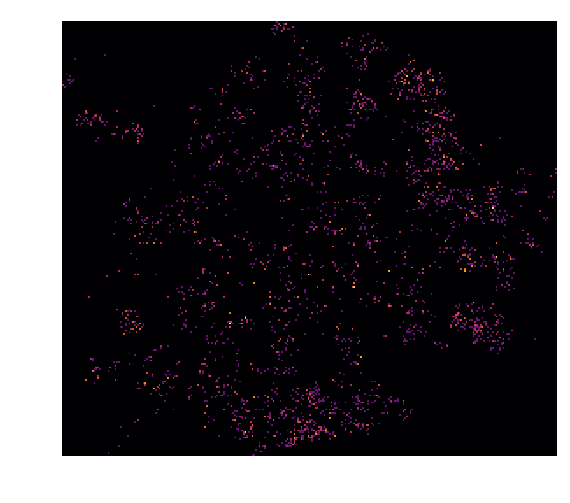

In [43]:
view = table.groupby('cell').total.sum()
heatmap = get_cell_series_heatmap(view, cell_xys)
plot_heatmap(heatmap)

In [44]:
image = tf.shade(xr.DataArray(heatmap), alpha=150, cmap=inferno, how='log')

In [45]:
image.to_pil().save('viz/i/narkota.png')